<a href="https://www.kaggle.com/code/bukolaajayi/go-daddy-competition-project?scriptVersionId=121599319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Goal:
To estimate or forecast the monthly density of microbusinesses in a specific area. 

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/revealed_test.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [2]:
#reading the dataset
df_Sub = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv')
df_Starter = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')
df_Train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
df_Test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')

In [3]:
#checking out number of rows and columns of each dataset
print(df_Train.shape)
print(df_Test.shape)
print(df_Sub.shape)
print(df_Starter.shape)

(122265, 7)
(25080, 3)
(25080, 2)
(3142, 26)


In [4]:
df_Sub

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671
...,...,...
25075,56037_2023-06-01,3.817671
25076,56039_2023-06-01,3.817671
25077,56041_2023-06-01,3.817671
25078,56043_2023-06-01,3.817671


In [5]:
#information on the test dataset
df_Test.head(3)

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01


In [6]:
#unique dates in test dataset
df_Test.first_day_of_month.unique()

array(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
       '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
      dtype=object)

Test dataset spans from, November 2022 through June 2023.

In [7]:
print('The minimum date given for the train dataset:', df_Test['first_day_of_month'].min())
print('The maximum date given for the train dataset:', df_Test['first_day_of_month'].max())

The minimum date given for the train dataset: 2022-11-01
The maximum date given for the train dataset: 2023-06-01


In [8]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [9]:
#information on train datset
df_Train.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198


In [10]:
df_Train.first_day_of_month.unique()

array(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
       '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
       '2022-08-01', '2022-09-01', '2022-10-01'], dtype=object)

Train dataset spans from August 2019 through October 2022.

In [11]:
print('The number of states:', df_Train['state'].nunique())
print('The minimum date given for the train dataset:',  df_Train['first_day_of_month'].min())
print('The maximum date given for the train dataset:',  df_Train['first_day_of_month'].max())

The number of states: 51
The minimum date given for the train dataset: 2019-08-01
The maximum date given for the train dataset: 2022-10-01


Along with the row id, cfips, county, and state, first day of month, microbusiness density, and active fields are included in `train data`. 

Only row id, cfips, and first day of month are present in the `test data`. 

Microbusiness density for a specific cfips and at a specific first day of month is the value to be predicted.

## What number of cfips are there?
Let's now investigate the cfips data.

In [12]:
df_Train['cfips'].nunique(), df_Test['cfips'].nunique(), df_Starter['cfips'].nunique()

(3135, 3135, 3142)

- We have test and train data totaling 3135 cfips.
- There are 3142 cfips overall (according to census statistics).
- The train and test datasets do not contain all of the cfips for which we do have census data.

## Data Cleaning

In [13]:
#converting the date to datetime
df_Test['first_day_of_month'] = pd.to_datetime(df_Test['first_day_of_month'])
df_Train['first_day_of_month'] = pd.to_datetime(df_Train['first_day_of_month'])

In [14]:
#converting the date to datetime
df_Test['first_day_of_month'] = pd.to_datetime(df_Test['first_day_of_month'])
df_Train['first_day_of_month'] = pd.to_datetime(df_Train['first_day_of_month'])

In [15]:
df_Train['year'] = df_Train['first_day_of_month'].dt.year
df_Train['month'] = df_Train['first_day_of_month'].dt.month

In [16]:
#merging the train and starter dataset on cfips column
df_trainMerged = df_Train.merge(df_Starter, on = 'cfips', how = 'left')
df_trainMerged.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [17]:
df_trainMerged.isna().sum()

row_id                    0
cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density     0
active                    0
year                      0
month                     0
pct_bb_2017               0
pct_bb_2018               0
pct_bb_2019               0
pct_bb_2020               0
pct_bb_2021               0
pct_college_2017          0
pct_college_2018          0
pct_college_2019          0
pct_college_2020          0
pct_college_2021          0
pct_foreign_born_2017     0
pct_foreign_born_2018     0
pct_foreign_born_2019     0
pct_foreign_born_2020     0
pct_foreign_born_2021     0
pct_it_workers_2017       0
pct_it_workers_2018      39
pct_it_workers_2019       0
pct_it_workers_2020       0
pct_it_workers_2021       0
median_hh_inc_2017        0
median_hh_inc_2018       39
median_hh_inc_2019        0
median_hh_inc_2020       39
median_hh_inc_2021       39
dtype: int64

In [18]:
#sample is the df_trainMerged['pct_bb_2018']column which we can also view below
df_null = df_trainMerged[df_trainMerged['pct_it_workers_2018'].isnull()]
df_null.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
70707,35039_2019-08-01,35039,Rio Arriba County,New Mexico,2019-08-01,2.472180,742,2019,8,49.1,...,0.8,NaN,0.8,0.4,0.7,33422,NaN,39952,42264.0,46994.0
70708,35039_2019-09-01,35039,Rio Arriba County,New Mexico,2019-09-01,2.458852,738,2019,9,49.1,...,0.8,NaN,0.8,0.4,0.7,33422,NaN,39952,42264.0,46994.0


- After merging, we can see that some columns now have null values which needs to be cleaned up

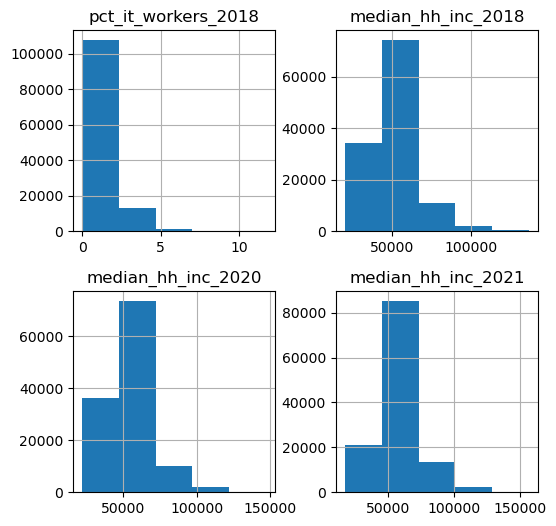

In [19]:
#showing the distribution of the columns with null values
data1 = df_trainMerged[['pct_it_workers_2018','median_hh_inc_2018', 'median_hh_inc_2020', 'median_hh_inc_2021']]
data1.hist(bins = 5, figsize=(6,6))
plt.show()

- The null columns are skewed to the left they are also numerical, therfore, I would be  using the median value for replacing the missing values.


In [20]:
#filling the null values with the median
df_trainMerged['pct_it_workers_2018']= df_trainMerged['pct_it_workers_2018'].fillna(df_trainMerged['pct_it_workers_2018'].median())
df_trainMerged['median_hh_inc_2018']= df_trainMerged['median_hh_inc_2018'].fillna(df_trainMerged['median_hh_inc_2018'].median())
df_trainMerged['median_hh_inc_2020']= df_trainMerged['median_hh_inc_2020'].fillna(df_trainMerged['median_hh_inc_2020'].median())
df_trainMerged['median_hh_inc_2021']= df_trainMerged['median_hh_inc_2021'].fillna(df_trainMerged['median_hh_inc_2021'].median())

## Exploratory Data Analysis

### Most frequent Counties

In [21]:
def chart_plot(plot_data, y, x, title,  yaxis_title, xaxis_title, color_continuous_scale):
    plt.rcParams["figure.figsize"] = (8,6)
    fig = px.bar(plot_data, y= y, x = x, color = x,  color_continuous_scale = color_continuous_scale,
                 labels={'county':'state county'}, height=500,
                title = title )

    # fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.update_layout(yaxis = dict(autorange = 'reversed'),
                       title = dict(
                        x = 0.5,
                        y = 0.95,
                    font = dict(
                    family = 'Arial',
                    color = '#000000')),
                      yaxis_title =  yaxis_title,
                      xaxis_title =  xaxis_title,
            autosize = False,
            width = 700)

    #showing the chart
    fig.show()

In [22]:
#grouping the country based on their count in a descending order
top_county = df_trainMerged['county'].groupby(df_trainMerged['county']).size().sort_values(ascending = False)
top_county = top_county.reset_index(name='counts')
top_county = top_county.head(10)
chart_plot(top_county, 'county', 'counts', 'Most frequent Counties', 'county', 'counts', 'mint')

The most microbusinesses are located in Washington, Jefferson County, Franklin County, and other places.

### Counties with the highest average microbusinesses densities

In [23]:
top_countyM = df_trainMerged.groupby('county')['microbusiness_density'].mean().sort_values(ascending=False)
top_countyM = top_countyM.reset_index()
top_countyM = top_countyM.head(10)
chart_plot(top_countyM, 'county', 'microbusiness_density', 'Counties with the highest density of microbusinesses', 'county', 'microbusiness_density', 'tealrose')

Carson City, Rio Grande and Boundary county have highest average microbusiness density

### The most active counties for microbusinesses

In [24]:
active_countyM = df_trainMerged.groupby('county')['active'].sum().sort_values(ascending=False)
active_countyM = active_countyM.reset_index()
active_countyM = active_countyM.head(10)
chart_plot(active_countyM, 'county', 'active', 'the most active counties for microbusinesses', 'county', 'active_microbusiness', 'tempo')

In [25]:
df_TrainedMerged = df_trainMerged.groupby('month')['microbusiness_density'].mean().reset_index()

#plotting the chart
plt.rcParams["figure.figsize"] = (10,8)
fig = px.line(df_TrainedMerged, x="month", y="microbusiness_density")
fig.update_traces(line=dict( width=3.0))
fig.update_traces(line_color='#456987')


fig.update_layout(title_text ='average microbusiness densities by months', yaxis_title = 'average microbusiness density',
                  xaxis_title = 'month')
#setting the chart properties
fig.update_layout(
    autosize=False,
    width=700,
    height=600,)

#showing the chart
fig.show()

The month of October has the highest average(Peak Period) microbusiness density, followed by the months of July and April.

- Let's look into the number of counties in each state first. To quote Wikipedia:

Texas has the most counties with 254 while Delaware has the fewest with only 3. However, there is one exceptional state: District of Columbia, which also has its own county.

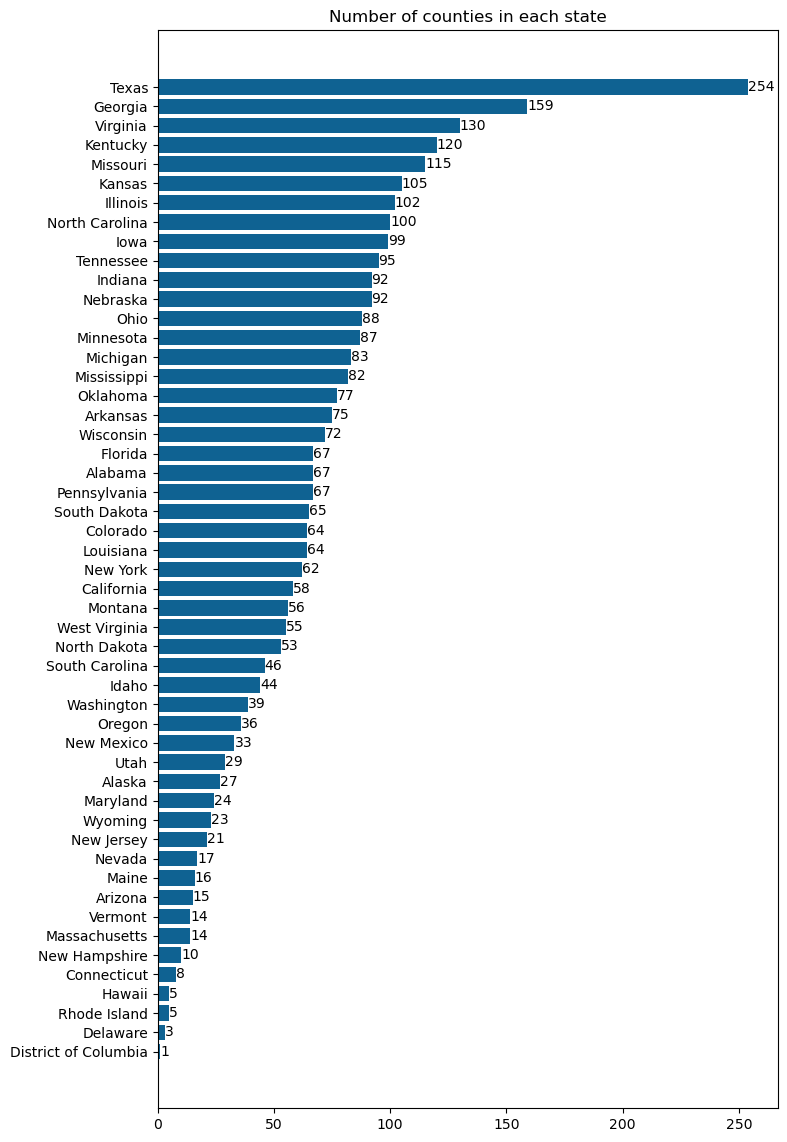

In [26]:
state_c = df_trainMerged[['state', 'cfips']].drop_duplicates(subset=['cfips']).groupby(['state']).size().sort_values()
fig, ax = plt.subplots(figsize=(8,14))
bars = ax.barh(state_c.index, state_c.values,  color='#0F6292')
ax.bar_label(bars)
ax.set_title('Number of counties in each state')
plt.show()

- This is a confirmation to the assertions made on wikipedia

In [27]:
df_trainMerged[['microbusiness_density', 'active']]

,microbusiness_density,active
0,3.007682,1249
1,2.884870,1198
2,3.055843,1269
3,2.993233,1243
4,2.993233,1243
...,...,...
122260,1.803249,101
122261,1.803249,101
122262,1.785395,100
122263,1.785395,100


In [28]:
df_trainMerged["microbusiness_density"].corr(df_trainMerged["active"])

0.3169811826046079

- There is weak correlation between the density of operating microbusinesses and their densities.

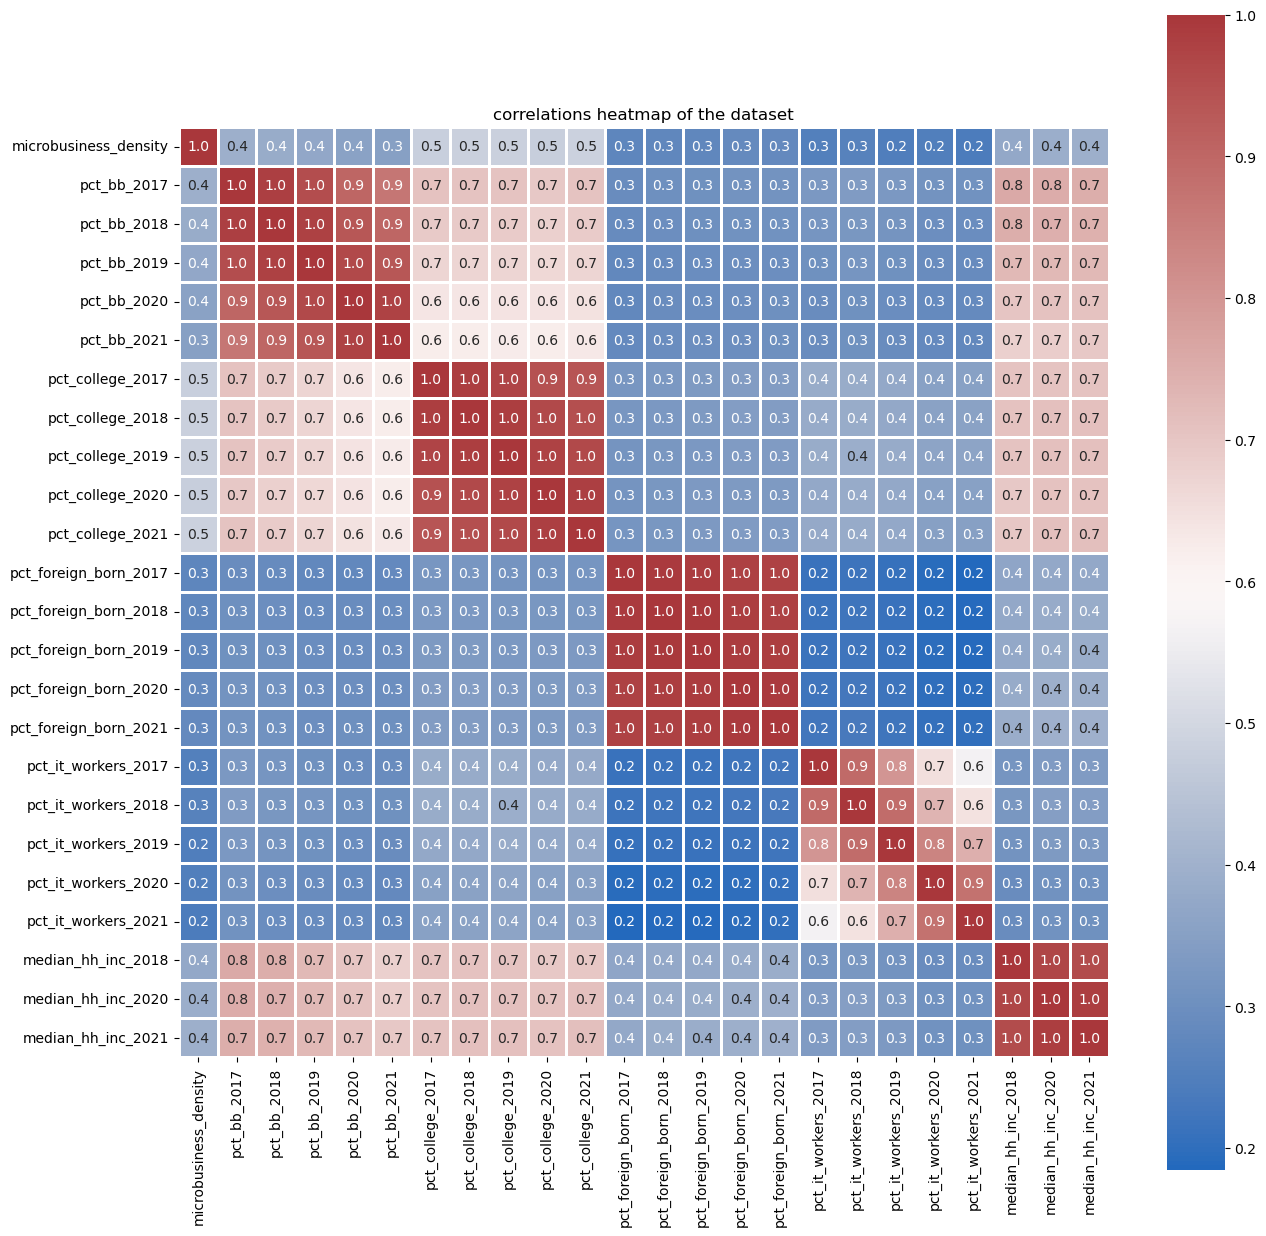

In [29]:
data_float =  df_trainMerged.select_dtypes(include="float")
plt.figure(figsize=(15,15))
sns.heatmap(data_float.corr(), annot=True,  square=True, linecolor='white',linewidths = 2, fmt= '.1f', cmap="vlag")
plt.title('correlations heatmap of the dataset', fontsize= 12)
plt.show()

It is evident that independent characteristics themselves exhibit many collinearities.

### Determining the numerical columns' correlation with the target variable

In [30]:
df_trainMerged.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [31]:
#loan_id will be dropped because it has numeruous unique ids
df_trainMerged = df_trainMerged.drop('cfips', axis = 1)

#selecting only the numerical columns
numerical_colms = df_trainMerged.select_dtypes('number').columns
numerical_colms

Index(['microbusiness_density', 'active', 'year', 'month', 'pct_bb_2017',
       'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021',
       'pct_college_2017', 'pct_college_2018', 'pct_college_2019',
       'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017',
       'pct_foreign_born_2018', 'pct_foreign_born_2019',
       'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017',
       'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020',
       'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018',
       'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [32]:
#showing the relationship between loan_status and other columns
df_trainMerged.corr()['microbusiness_density'].sort_values(ascending = False)

microbusiness_density    1.000000
pct_college_2021         0.484153
pct_college_2019         0.482557
pct_college_2018         0.481764
pct_college_2017         0.480409
pct_college_2020         0.476635
median_hh_inc_2021       0.394345
pct_bb_2017              0.393485
median_hh_inc_2020       0.391271
pct_bb_2018              0.383592
median_hh_inc_2019       0.383006
median_hh_inc_2018       0.373871
pct_bb_2019              0.371221
median_hh_inc_2017       0.365038
pct_bb_2020              0.355352
pct_bb_2021              0.349566
active                   0.316981
pct_foreign_born_2020    0.284484
pct_foreign_born_2021    0.280956
pct_foreign_born_2018    0.276318
pct_foreign_born_2019    0.275900
pct_foreign_born_2017    0.272928
pct_it_workers_2018      0.259185
pct_it_workers_2017      0.252017
pct_it_workers_2020      0.249607
pct_it_workers_2019      0.246404
pct_it_workers_2021      0.241921
year                     0.017025
month                    0.002121
Name: microbus

The pct college columns have the strongest association with microbusiness density, despite the fact that they all have weak correlations. This suggests that the percentage of residents who have completed four years of education(college) can predict the number of microbusinesses that will be established in a county.

### Data Skewness

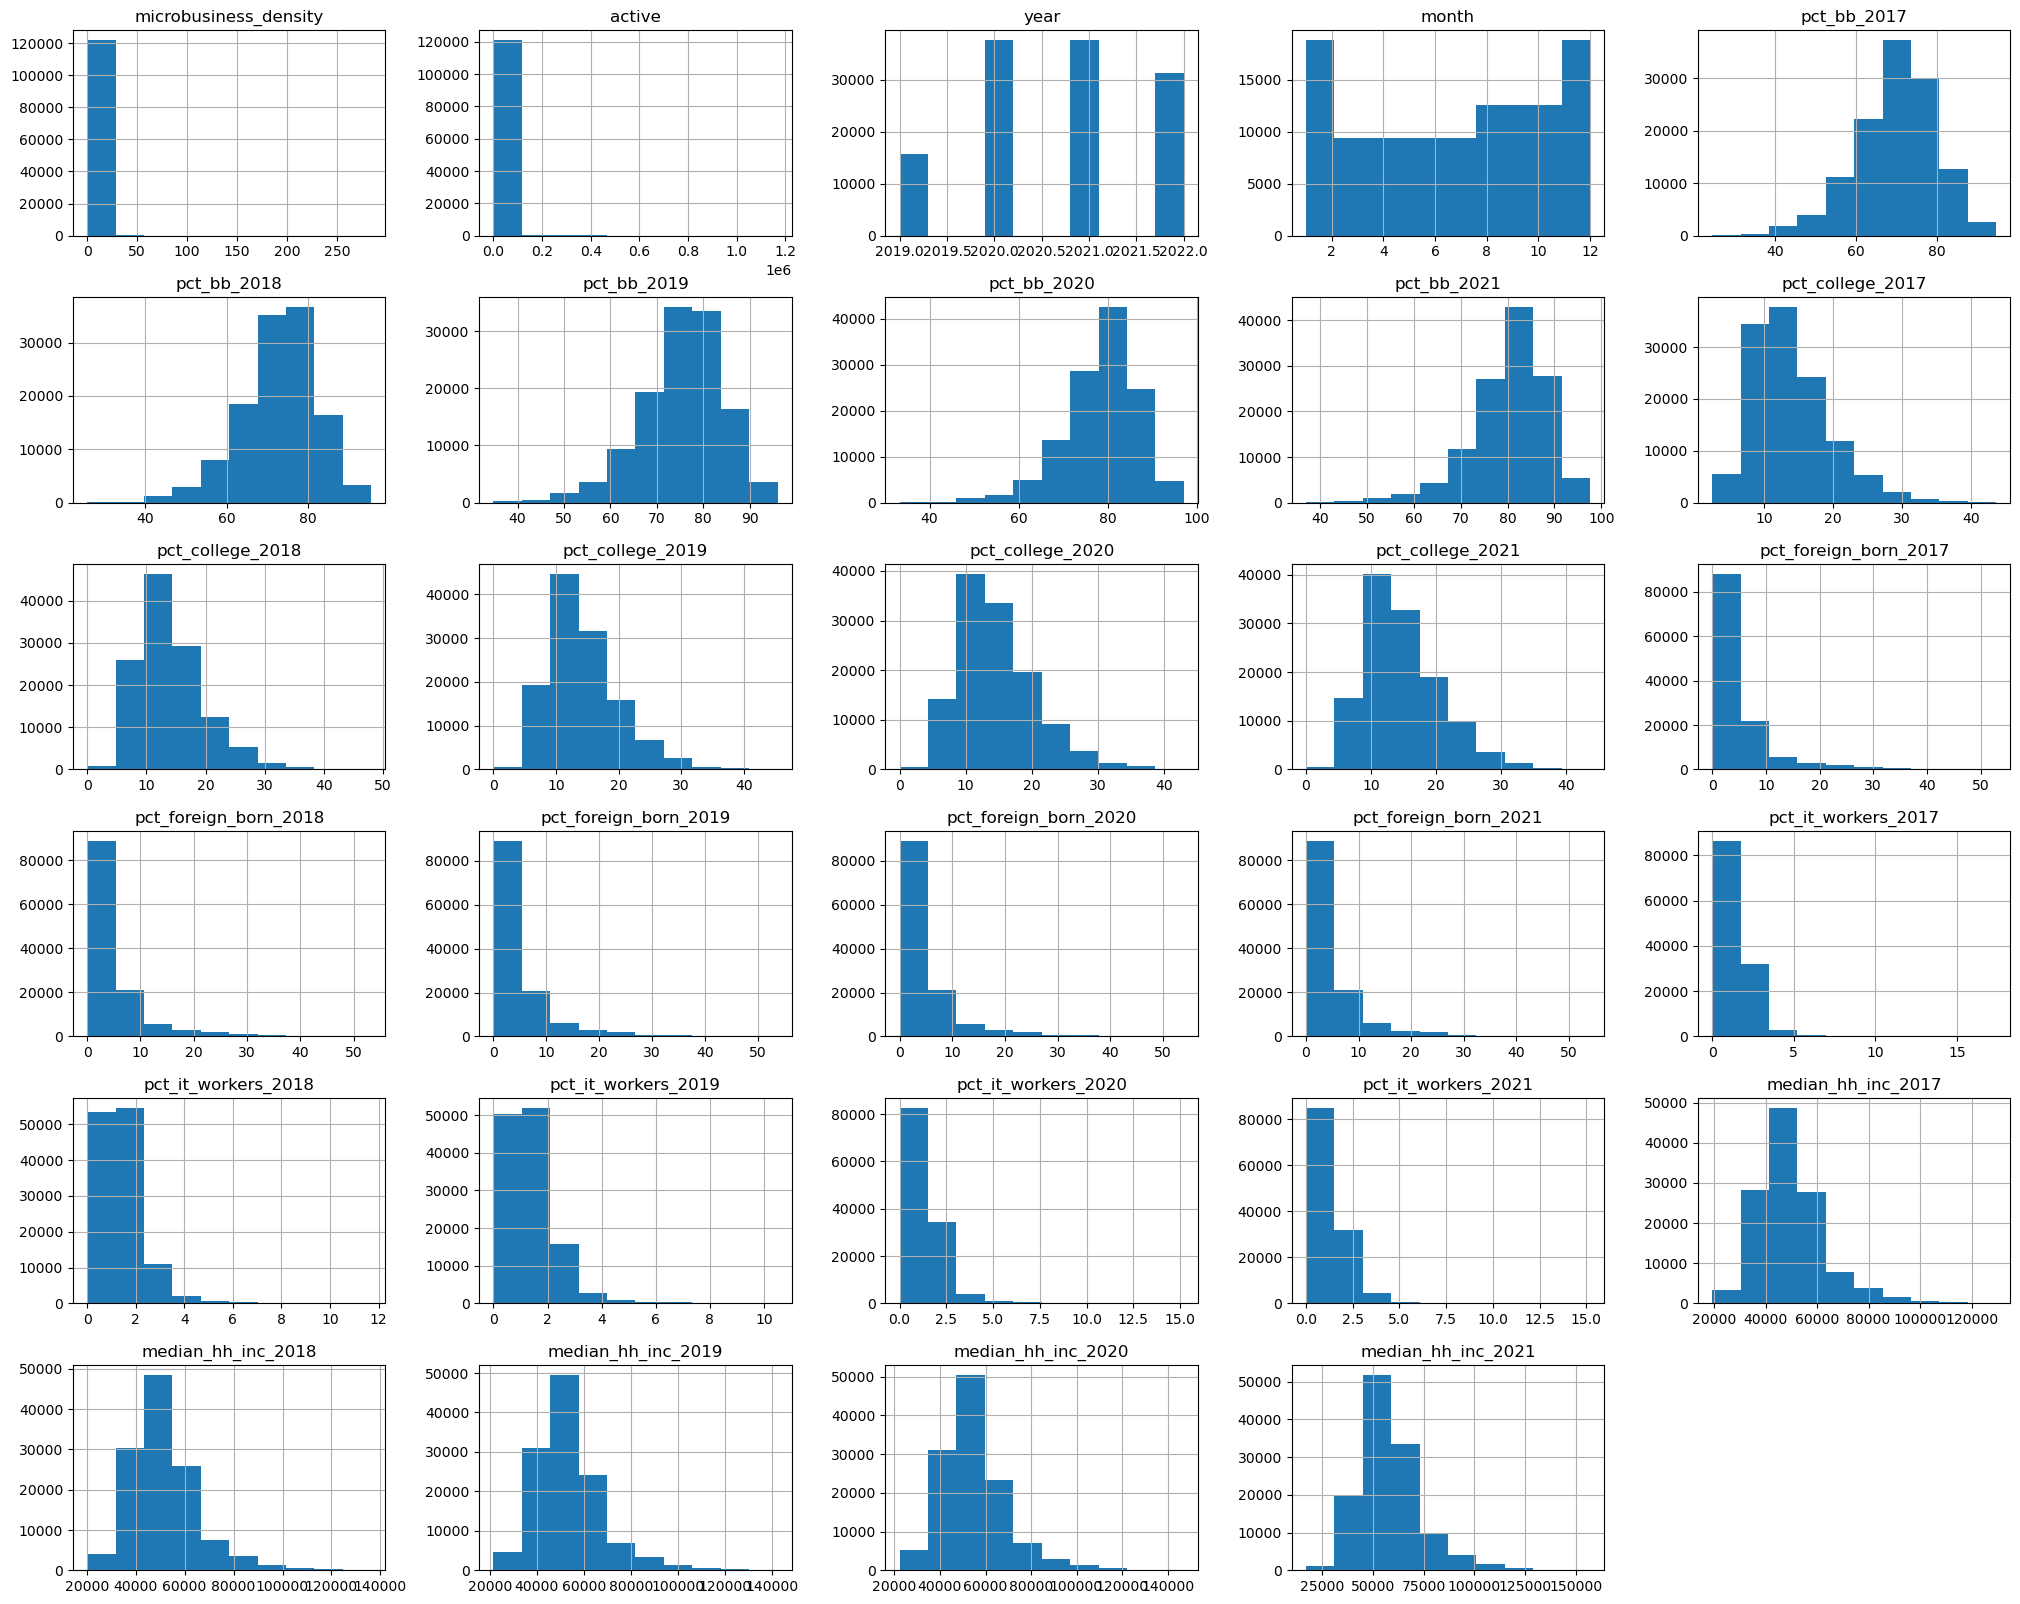

In [33]:
#checking their distribution
df_trainMerged[numerical_colms].hist(figsize=[25,20])
plt.show()

In [34]:
#the skewed columns and checking their skewness
skew_cols = df_trainMerged[numerical_colms].skew().sort_values(ascending = False)
skew_cols

active                   17.572118
microbusiness_density    15.970181
pct_foreign_born_2021     2.895010
pct_foreign_born_2020     2.884731
pct_foreign_born_2017     2.880385
pct_foreign_born_2019     2.877411
pct_foreign_born_2018     2.867421
pct_it_workers_2017       2.715739
pct_it_workers_2020       2.537363
pct_it_workers_2021       2.472800
pct_it_workers_2019       2.032956
pct_it_workers_2018       1.983823
median_hh_inc_2020        1.328762
median_hh_inc_2021        1.326648
median_hh_inc_2019        1.306155
median_hh_inc_2018        1.296124
median_hh_inc_2017        1.258927
pct_college_2018          1.043712
pct_college_2017          1.023349
pct_college_2019          1.008926
pct_college_2020          0.958000
pct_college_2021          0.935755
month                    -0.129638
year                     -0.144946
pct_bb_2017              -0.523864
pct_bb_2018              -0.637573
pct_bb_2019              -0.760501
pct_bb_2020              -0.899478
pct_bb_2021         

- Positive value means the distribution is skewed to the right.
- Negative value means the distribution is skewed to the left.
- 0 means perfect normal distribution. The bell shaped curve.
- This demonstrates that a higher proportion of the dataset is skewed and must therefore be processed.

### Identifying outliers in columns

In [35]:
#looking out for outliers
def outliers_analysis():
        cols_store = []
    
        for col in df_trainMerged.select_dtypes('number'): 
            q1 = df_trainMerged[col].quantile(.25)
            q3 = df_trainMerged[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df_trainMerged[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df_trainMerged[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                cols_store.append(col)

        return cols_store

In [36]:
#using the defined function
out_cols = outliers_analysis()

#these are the ouliers columns 
out_cols

['microbusiness_density',
 'active',
 'pct_bb_2017',
 'pct_bb_2018',
 'pct_bb_2019',
 'pct_bb_2020',
 'pct_bb_2021',
 'pct_college_2017',
 'pct_college_2018',
 'pct_college_2019',
 'pct_college_2020',
 'pct_college_2021',
 'pct_foreign_born_2017',
 'pct_foreign_born_2018',
 'pct_foreign_born_2019',
 'pct_foreign_born_2020',
 'pct_foreign_born_2021',
 'pct_it_workers_2017',
 'pct_it_workers_2018',
 'pct_it_workers_2019',
 'pct_it_workers_2020',
 'pct_it_workers_2021',
 'median_hh_inc_2017',
 'median_hh_inc_2018',
 'median_hh_inc_2019',
 'median_hh_inc_2020',
 'median_hh_inc_2021']

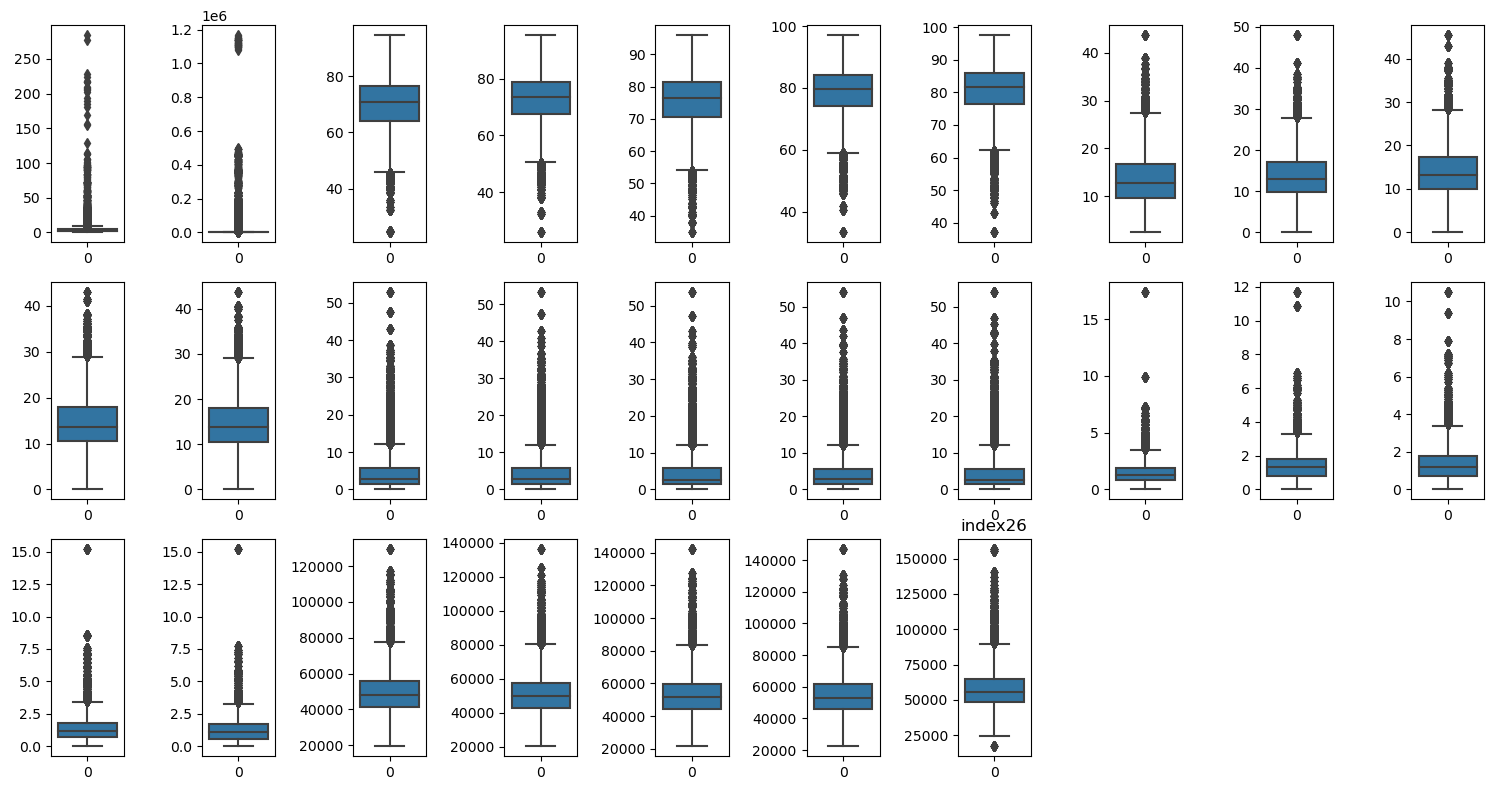

In [37]:
# Visualizing the boxplot for the columns with outliers
plt.figure (figsize=(15,8))
for index, col in enumerate(out_cols):
    plt.subplot (3,10, index+1)
    sns.boxplot(df_trainMerged[col])
plt.tight_layout()
plt.title(f'index{index}')
plt. show()

## Data Preprocessing
- 1.  Dealing with skewed data using log transformation: transform skewed distribution to a normal distribution


In [38]:
#importing the required library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
# transforming skewness in the skewed columns 
df_trainMerged[numerical_colms] = df_trainMerged[numerical_colms].apply(lambda x: np.log (x + 1))

<function matplotlib.pyplot.show(close=None, block=None)>

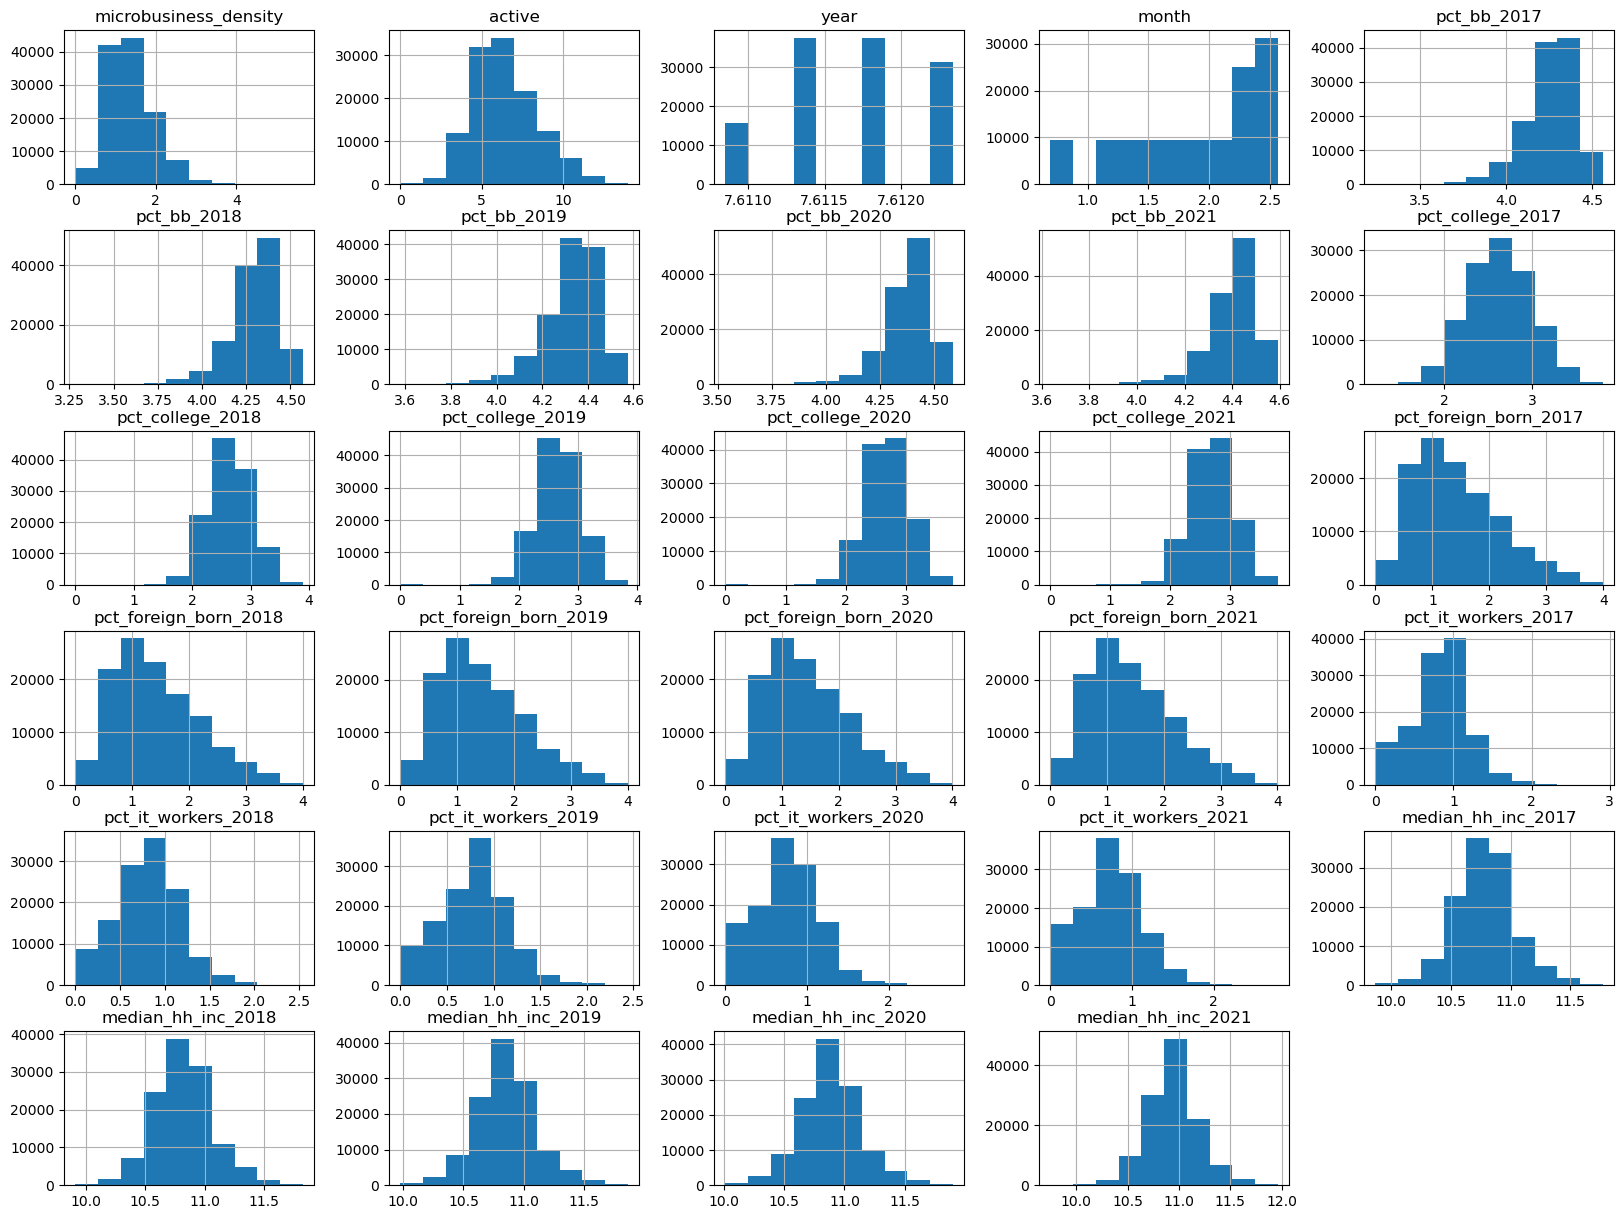

In [40]:
# The figure below shows that the columns have been transformed nicely
df_trainMerged[numerical_colms].hist (figsize=(20, 15))
plt.show

- 2.   Dealing with Outliers using StandardScaler

In [41]:
#importing the required library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
# Scaling the columns with outliers
df_trainMerged[out_cols] = scaler.fit_transform(df_trainMerged[out_cols])
df_trainMerged[out_cols].head()

,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,0.025405,0.349383,0.681983,0.663182,0.588159,0.509406,0.617368,0.305638,0.504921,0.491454,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.549827,0.647868,0.500146,0.335402,0.417815
1,-0.029355,0.328581,0.681983,0.663182,0.588159,0.509406,0.617368,0.305638,0.504921,0.491454,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.549827,0.647868,0.500146,0.335402,0.417815
2,0.046423,0.357310,0.681983,0.663182,0.588159,0.509406,0.617368,0.305638,0.504921,0.491454,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.549827,0.647868,0.500146,0.335402,0.417815
3,0.019051,0.346980,0.681983,0.663182,0.588159,0.509406,0.617368,0.305638,0.504921,0.491454,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.549827,0.647868,0.500146,0.335402,0.417815
4,0.019051,0.346980,0.681983,0.663182,0.588159,0.509406,0.617368,0.305638,0.504921,0.491454,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.549827,0.647868,0.500146,0.335402,0.417815


## Data modeling

In [43]:
#importing the sci-kit learn libraries

# Random Forests
from sklearn.ensemble import RandomForestRegressor


#r2_score
from sklearn.metrics import r2_score


# For splitting the dataset 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [44]:
X = df_trainMerged[out_cols].drop('microbusiness_density', axis = 1)
y = df_trainMerged[out_cols].microbusiness_density

#the 'X' contain the feature data
training_data = X

#the 'y' dataset that contains the label/target dataset
testing_data = y

In [45]:
# splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.2)

In [46]:
print(X_train,X_test,y_train,y_test)

          active  pct_bb_2017  pct_bb_2018  pct_bb_2019  pct_bb_2020  \
81750   1.950759     0.769359     0.828673     0.841066     0.805567   
2121   -0.118300    -0.938181    -1.439827    -0.965371    -0.933738   
105191 -0.816766     0.085016    -0.028105     0.078305     0.346646   
78527  -0.337368     0.760672     0.981656     1.049039     0.929569   
94987  -0.588799     0.027185    -0.141204     0.172490    -0.067881   
...          ...          ...          ...          ...          ...   
119879 -0.321809     0.075411    -0.038316     0.203642     0.169729   
103694 -0.686695    -0.849555    -0.779088    -0.846443    -0.921123   
860    -0.093449     0.056161     0.083298     0.224343     0.313738   
15795  -0.436705    -1.855778    -1.652618    -1.320528    -1.048070   
121958 -0.417786    -0.080129    -0.298259    -0.432264    -0.418590   

        pct_bb_2021  pct_college_2017  pct_college_2018  pct_college_2019  \
81750      0.815899          0.556946          0.568659   

### RandomForest

In [47]:
model = RandomForestRegressor(bootstrap=True, random_state=42, n_jobs=-1)
#fitting the model to the dataset
model.fit(X_train, y_train)

# train the model
RF_training_prediction = model.predict(X_train)
RF_testing_prediction = model.predict(X_test)

In [48]:
arr = np.array(RF_training_prediction)
print(arr) 

[ 1.3415632  -0.59206718 -0.68052444 ... -0.90316171  0.08008246
  0.37295664]


In [49]:
#measuring the precision of the model 
from sklearn.metrics import r2_score
print('The performance of the model on the training dataset is',r2_score(RF_training_prediction, y_train))
print('The performance of the model on the testing dataset is',r2_score(RF_testing_prediction, y_test))

The performance of the model on the training dataset is 0.9995958721995456
The performance of the model on the testing dataset is 0.9990934798003339


### XGBoost

In [50]:
# import XGBoost
import xgboost as xgb

#convert the dataset into an optimized data structure called Dmatrix that XGBoost, supports and gives it acclaimed performance and efficiency gains.  
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [51]:
# splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 123)

In [52]:
#instantiating an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10,
                          n_estimators = 10)


#training the dataset using the .fit() method
xg_reg.fit(X_train,y_train)

[19:56:17] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [53]:
# make predictions on test and trained data
preds_test = xg_reg.predict(X_test)
preds_test 

array([-0.22017348,  0.44980833,  0.10936166, ..., -0.32858884,
       -0.53226846,  0.07290828], dtype=float32)

In [54]:
preds_train = xg_reg.predict(X_train)
preds_train

array([-0.30140078,  0.12587194, -0.27015957, ..., -0.08870867,
       -0.6027031 , -0.32248092], dtype=float32)

In [55]:
#calculating the rmse by using the mean_sqaured_error function from sklearn's metrics module
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE: %f" % (rmse))

RMSE: 0.643988


In [56]:
rmse = np.sqrt(mean_squared_error(y_train, preds_train))
print("RMSE: %f" % (rmse))

RMSE: 0.644545


In [57]:
#convert the prediction to dataframe 
pred = pd.DataFrame(preds_test, columns=['microbusiness_density'])

In [58]:
#take row_id column from df_Sub and concat with pred
sub = pd.concat([df_Sub.row_id, pred],axis=1)

In [59]:
#Set row_id as index
sub.set_index('row_id',inplace=True)


In [60]:
#Make csv of above dataframe sub  
df_Sub2 = sub.to_csv(f"new_Sub.csv")

 ## Conclusions
From the overall analysis, certain conclusions have been drawn, which include the following:
- Areas with the highest concentration of microbusinesses include Washington, Jefferson County, Franklin County, and other regions. 
- Los Angeles, Orange County, Maricopa County, and other locations have the most active microbusinesses. 
- Carson City, Rio Grande, and Boundary County have the greatest average microbusiness density.
- The highest average (Peak Period) microbusiness density is found in the month of October, followed by the months of July and April. 
- Independent features clearly show a great deal of collinearity.
- We that RMSE prediction for test dataset using XGBOOST came out to be 0.65 which is more accurate